# GDAL - Geospatial Data Access Library

## Open dataset and fetch information

In [1]:
!wget -P data -nc ftp://ftp.nersc.no/nansat/test_data/meris_l1/MER_FRS_1PNPDK20120303_093810_000000333112_00180_52349_3561.N1

File ‘data/MER_FRS_1PNPDK20120303_093810_000000333112_00180_52349_3561.N1’ already there; not retrieving.


In [7]:
import matplotlib.pyplot as plt
import numpy as np
import gdal


dataset = gdal.Open('data/MER_FRS_1PNPDK20120303_093810_000000333112_00180_52349_3561.N1')
print ('Size is %d x %d x %d' % (dataset.RasterXSize,
                                dataset.RasterYSize,
                                dataset.RasterCount))
print (dataset.GetMetadata()['MPH_SENSING_START'])
%matplotlib inline


Size is 4481 x 769 x 17
03-MAR-2012 09:38:10.449011


### Access band and fetch raw data

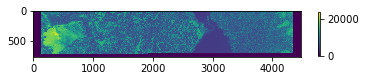

In [8]:
band = dataset.GetRasterBand(1)
array = band.ReadAsArray()
plt.figure()
plt.imshow(array)
plt.colorbar(shrink=0.2)
plt.show()

### Read subsection of the image

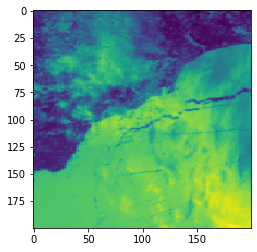

In [9]:
arr1 = band.ReadAsArray(xoff=200, yoff=200,
                        win_xsize=200, win_ysize=200)
plt.imshow(arr1)


### Compute histogram

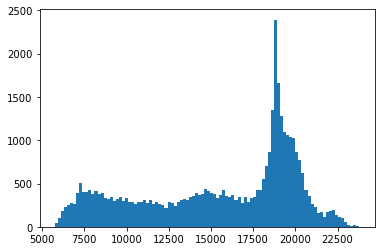

In [10]:
plt.figure()
ans = plt.hist(arr1.flatten(), 100)
plt.show()

### Calculate band ratio

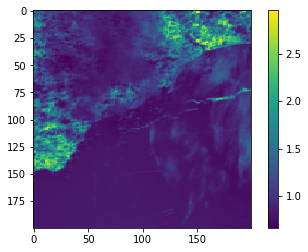

In [11]:
arr2 = dataset.GetRasterBand(8).ReadAsArray(200, 200, 200, 200).astype('float32')
arr_ratio = arr1 / arr2 
plt.figure()
plt.imshow(arr_ratio);plt.colorbar()
plt.show()

### Create scatter-plot of two bands

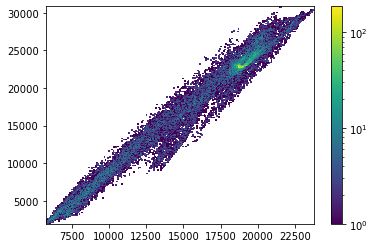

In [12]:
from matplotlib.colors import LogNorm
plt.figure()
ans = plt.hist2d(arr1.flatten(), arr2.flatten(), 300, norm=LogNorm())
plt.colorbar()
plt.show()

## Command line tools

### Get information about the dataset 

In [13]:
!gdalinfo data/MER_FRS_1PNPDK20120303_093810_000000333112_00180_52349_3561.N1

Driver: ESAT/Envisat Image Format
Files: data/MER_FRS_1PNPDK20120303_093810_000000333112_00180_52349_3561.N1
Size is 4481, 769
Coordinate System is `'
GCP Projection = 
GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0,
        AUTHORITY["EPSG","8901"]],
    UNIT["degree",0.0174532925199433,
        AUTHORITY["EPSG","9122"]],
    AUTHORITY["EPSG","4326"]]
GCP[  0]: Id=1, Info=
          (0.5,0.5) -> (34.698006,61.259824,0)
GCP[  1]: Id=2, Info=
          (64.5,0.5) -> (34.427957,61.334252,0)
GCP[  2]: Id=3, Info=
          (128.5,0.5) -> (34.156082,61.408287,0)
GCP[  3]: Id=4, Info=
          (192.5,0.5) -> (33.883449,61.481635,0)
GCP[  4]: Id=5, Info=
          (256.5,0.5) -> (33.612048,61.553771,0)
GCP[  5]: Id=6, Info=
          (320.5,0.5) -> (33.337121,61.625957,0)
GCP[  6]: Id=7, Info=
          (384.5,0.5) -> (33.062217,61.69725,0)
GCP[  7]: Id

### Translate data from one format to another

In [14]:
!gdal_translate -b 1 data/MER_FRS_1PNPDK20120303_093810_000000333112_00180_52349_3561.N1 data/temp1.vrt
!ls -l data
!cat data/temp1.vrt

Input file size is 4481, 769
total 657468
-rw-r--r-- 1 root root  38520313 Oct 16 11:49 A2014275111000.L2_LAC.NorthNorwegianSeas.hdf
-rw-r--r-- 1 root root 104217377 Oct 16 11:50 A2015121113500.L2_LAC.NorthNorwegianSeas.hdf
-rw-r--r-- 1 root root 186228481 Oct 16 11:50 A2015122122000.L2_LAC.NorthNorwegianSeas.hdf
-rw-r--r-- 1 root root 113932155 Oct 16 10:24 MER_FRS_1PNPDK20120303_093810_000000333112_00180_52349_3561.N1
-rw-r--r-- 1 root root  90494897 Oct  6 13:33 gfs_4_20191001_0000_000.grb2
-rw-r--r-- 1 root root     98540 Feb  4 14:25 temp1.vrt
-rw-r--r-- 1 root root  88037487 Dec 16 12:54 temp2.tif
-rwxr-xr-x 1 root root     53357 Nov  6  2017 times_ostia_-120_-130_-5_5.npy
-rwxr-xr-x 1 root root      1047 Sep 20  2017 tsprofile.txt
-rw-r--r-- 1 root root      6108 Oct 16 13:40 wm.png
<VRTDataset rasterXSize="4481" rasterYSize="769">
  <Metadata>
    <MDI key="DS_ATTITUDE_DATA_FILE_NAME">AUX_ATT_AXVIEC20020924_131534_20020703_120000_20781231_235959</MDI>
    <MDI key="DS_DIGITAL_E

### Reproject data from one grid to another

In [15]:
!gdalwarp -t_srs '+proj=longlat' -te 12 61 34 65 -tr 0.002 0.001 -r bilinear -overwrite data/temp1.vrt  data/temp2.tif

pj_obj_create: Open of /opt/conda/share/proj failed
pj_obj_create: Open of /opt/conda/share/proj failed
pj_obj_create: Open of /opt/conda/share/proj failed
Creating output file that is 11000P x 4000L.
Processing data/temp1.vrt [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.


### View results of reprojection

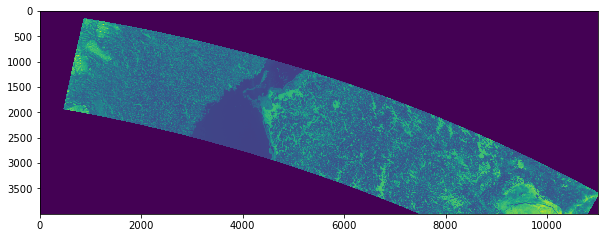

In [16]:
ds = gdal.Open('data/temp2.tif')
b = ds.GetRasterBand(1)
a = b.ReadAsArray()
plt.figure(figsize=(10,10))
plt.imshow(a)
plt.show()

In [17]:
!gdalwarp --help

Usage: gdalwarp [--help-general] [--formats]
    [-s_srs srs_def] [-t_srs srs_def] [-to "NAME=VALUE"]* [-novshiftgrid]
    [-order n | -tps | -rpc | -geoloc] [-et err_threshold]
    [-refine_gcps tolerance [minimum_gcps]]
    [-te xmin ymin xmax ymax] [-tr xres yres] [-tap] [-ts width height]
    [-ovr level|AUTO|AUTO-n|NONE] [-wo "NAME=VALUE"] [-ot Byte/Int16/...] [-wt Byte/Int16]
    [-srcnodata "value [value...]"] [-dstnodata "value [value...]"] -dstalpha
    [-r resampling_method] [-wm memory_in_mb] [-multi] [-q]
    [-cutline datasource] [-cl layer] [-cwhere expression]
    [-csql statement] [-cblend dist_in_pixels] [-crop_to_cutline]
    [-of format] [-co "NAME=VALUE"]* [-overwrite]
    [-nomd] [-cvmd meta_conflict_value] [-setci] [-oo NAME=VALUE]*
    [-doo NAME=VALUE]*
    srcfile* dstfile

Available resampling methods:
    near (default), bilinear, cubic, cubicspline, lanczos, average, mode,  max, min, med, Q1, Q3.
